# Time Series Decomposition Assignment
## Lance Dugger

In [143]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Private Construction

Read in data.

In [164]:
df = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


Plot data to understand whether a linear or nonlinear model should be developed.

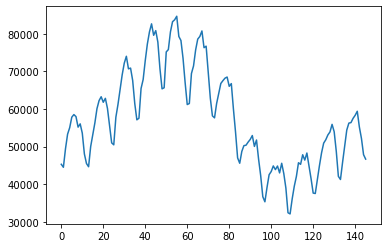

In [145]:
plt.plot(df['Private Construction'])

Define moving average and squared error columns then populate them with values.  The code first converts the data frame index to a time series index to allow us to do time series analysis.  Then the moving average window is defined.  This number represents how many data points will be averaged for each moving average data point.  The for loop then iterates through the data, which the current data point being the center of the window.  After the moving averages are calculated, the squared error is calculated by subtracting the moving average from the respective data point.  Finally, because this moving average requires twelve data points preceding it twelve data points following it, the first twelve data points in the dataframe and the last 12 data points in the data frame are removed.

In [165]:
df['MovAvg'] = np.NaN
df['sqErr'] = np.NaN

df.index = pd.DatetimeIndex(freq='m',data=pd.date_range(freq='m',start=pd.Timestamp(year = 2002,month=1,day=31), periods=len(df['Private Construction'])))
window = 24
window = window - window % 2
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvg'] = (0.5*df.iloc[i - int(window/2)]['Private Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Private Construction'])/float(window)

df['sqErr'] = (df['Private Construction'] - df['MovAvg'])**2
df.dropna(how='any',inplace=True)

df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr
2003-01-31,13,Jan-03,59877,45473,14404,54694.375000,8.503376e+07
2003-02-28,14,Feb-03,58526,44620,13906,54937.625000,1.064534e+08
2003-03-31,15,Mar-03,64506,49996,14510,55237.083333,2.746895e+07
2003-04-30,16,Apr-03,69638,53195,16444,55576.541667,5.671741e+06
2003-05-31,17,May-03,74473,56286,18187,55949.708333,1.130921e+05


In this cell, the residuals are calculated and converted to a percentage, so the viewer can understand how accurately the model portrays the actual data.  A plot is generated so that the viewer can visually assess how well the model is fitting the data.

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error
2003-01-31,13,Jan-03,59877,45473,14404,54694.375000,8.503376e+07,-9221.375000,0.168598
2003-02-28,14,Feb-03,58526,44620,13906,54937.625000,1.064534e+08,-10317.625000,0.187806
2003-03-31,15,Mar-03,64506,49996,14510,55237.083333,2.746895e+07,-5241.083333,0.094883
2003-04-30,16,Apr-03,69638,53195,16444,55576.541667,5.671741e+06,-2381.541667,0.042852
2003-05-31,17,May-03,74473,56286,18187,55949.708333,1.130921e+05,336.291667,0.006011
2003-06-30,18,Jun-03,80377,60076,20301,56392.541667,1.356787e+07,3683.458333,0.065318
2003-07-31,19,Jul-03,82971,62216,20755,56911.583333,2.813684e+07,5304.416667,0.093205
2003-08-31,20,Aug-03,85191,63234,21957,57530.833333,3.252611e+07,5703.166667,0.099132
2003-09-30,21,Sep-03,83841,61767,22075,58188.187500,1.280790e+07,3578.812500,0.061504
2003-10-31,22,Oct-03,83133,62813,20321,58820.229167,1.594222e+07,3992.770833,0.067881


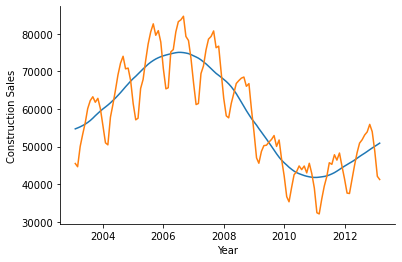

In [167]:
df['R1'] = df['Private Construction'] - df['MovAvg']
df['R1Error'] = abs(df['R1']/df['MovAvg'])

fig,ax = plt.subplots()
ax.plot(df['MovAvg'],label='Moving Avg.')
ax.plot(df['Private Construction'],label='Private Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Sales')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

pd.options.display.max_rows = None
display(df)

This plot shows the residuals, giving the viewer a visual understanding of the cyclical trend.

Average Residual:  -128.45833333333326


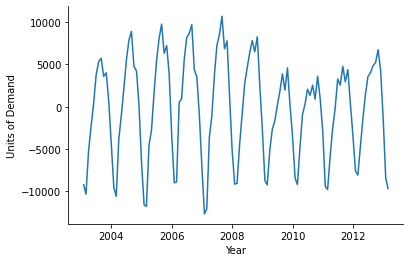

In [168]:
fig,ax = plt.subplots()
ax.plot(df['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', df['R1'].mean())

This code uses the autocorr function to determine which period should be used for the cyclicality.  In this case the period is twelve months or one year.

In [170]:
maxCorr = 0.0
period = np.NaN
for i in range(1,25):
    corr = df['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8120751333935452
Correlation, lag  2     0.4282692331526067
Correlation, lag  3     -0.02646646398974738
Correlation, lag  4     -0.40983995789979843
Correlation, lag  5     -0.6762655818700407
Correlation, lag  6     -0.8028731553529684
Correlation, lag  7     -0.7018407312644882
Correlation, lag  8     -0.455034007967167
Correlation, lag  9     -0.0816734668578855
Correlation, lag  10     0.36532271423582574
Correlation, lag  11     0.7409089597661687
Correlation, lag  12     0.9315626329218275
Correlation, lag  13     0.7658004796059998
Correlation, lag  14     0.4102417419615045
Correlation, lag  15     -0.02768745747839125
Correlation, lag  16     -0.402710829173791
Correlation, lag  17     -0.6610845035612412
Correlation, lag  18     -0.7864232287415243
Correlation, lag  19     -0.6871128546637586
Correlation, lag  20     -0.453009101761986
Correlation, lag  21     -0.09054074006874907
Correlation, lag  22     0.34563591085831186
Correlation, lag  23    

This code generates an average cyclical shape of the data based on the nine available periods.

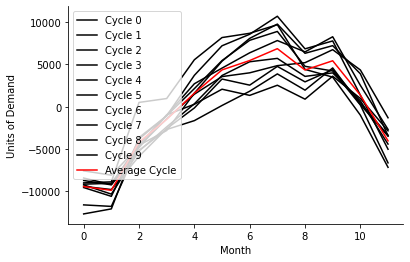

In [171]:
period = 12
cycleLen = period
numCycles = int(len(df)/cycleLen + 0.5)
cycles = [df.iloc[range(i*period,min((i+1)*period,len(df)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df.iloc[range(i,len(df['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

The cyclical data is added to the dataframe and then is plotted over the data to give a visual representation of the fit.

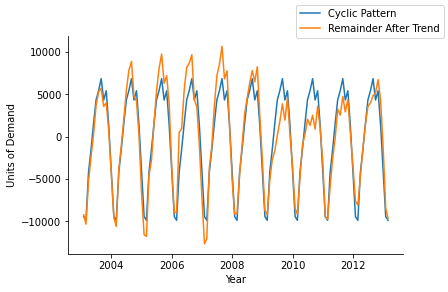

In [172]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df)/cycleLen + 0.5)
df['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df)):
    df.loc[df.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df['C'],label='Cyclic Pattern')
ax.plot(df['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

The moving average data and cyclical data are added together to form a final model.  This is subtracted from the actual data to give the residuals, which are converted to a percentage.  The squared error is taken of the residuals as well.  The data is then displayed, along with the average squared error and a plot of the model fitted over the data.

Average Squared Error:  3558365.103646059


,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error,C,fit,R2Private,R2ErrorPrivate
2003-01-31,13,Jan-03,59877,45473,14404,54694.375000,4.020709e+04,-9221.375000,0.168598,-9421.892045,45272.482955,200.517045,0.004410
2003-02-28,14,Feb-03,58526,44620,13906,54937.625000,2.017031e+05,-10317.625000,0.187806,-9868.511364,45069.113636,-449.113636,0.010065
2003-03-31,15,Mar-03,64506,49996,14510,55237.083333,1.140121e+06,-5241.083333,0.094883,-4173.318750,51063.764583,-1067.764583,0.021357
2003-04-30,16,Apr-03,69638,53195,16444,55576.541667,7.721283e+05,-2381.541667,0.042852,-1502.833333,54073.708333,-878.708333,0.016519
2003-05-31,17,May-03,74473,56286,18187,55949.708333,1.591635e+06,336.291667,0.006011,1597.891667,57547.600000,-1261.600000,0.022414
2003-06-30,18,Jun-03,80377,60076,20301,56392.541667,4.357458e+05,3683.458333,0.065318,4343.568750,60736.110417,-660.110417,0.010988
2003-07-31,19,Jul-03,82971,62216,20755,56911.583333,2.059703e+04,5304.416667,0.093205,5447.933333,62359.516667,-143.516667,0.002307
2003-08-31,20,Aug-03,85191,63234,21957,57530.833333,1.314897e+06,5703.166667,0.099132,6849.856250,64380.689583,-1146.689583,0.018134
2003-09-30,21,Sep-03,83841,61767,22075,58188.187500,5.677591e+05,3578.812500,0.061504,4332.310417,62520.497917,-753.497917,0.012199
2003-10-31,22,Oct-03,83133,62813,20321,58820.229167,2.037173e+06,3992.770833,0.067881,5420.066667,64240.295833,-1427.295833,0.022723


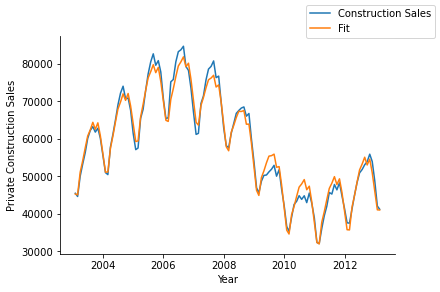

In [176]:
df['fit'] = df['MovAvg'] + df['C']
df['R2Private'] = df['Private Construction'] - df['fit']
df['R2ErrorPrivate'] = abs(df['R2Private']/df['Private Construction'])
df['sqErr'] = (df['Private Construction'] - df['fit'])**2

print('Average Squared Error: ', df['sqErr'].mean())
pd.options.display.max_rows = None
display(df)

fig,ax = plt.subplots()
ax.plot(df['Private Construction'],label='Construction Sales')
ax.plot(df['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Sales')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

## Public Construction

The exact same process was repeated for the public construction data.  I used different data frames to avoid any cross over when running code cells multiple times.

In [181]:
df1 = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
df1.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


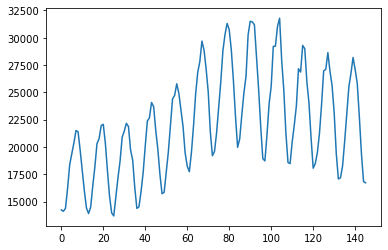

In [182]:
plt.plot(df1['Public Construction'])

In [183]:
df1['MovAvg'] = np.NaN
df1['sqErr'] = np.NaN

df1.index = pd.DatetimeIndex(freq='m',data=pd.date_range(freq='m',start=pd.Timestamp(year = 2002,month=1,day=31), periods=len(df1['Public Construction'])))
window = 24
window = window - window % 2
for i in range(int(window/2),df1.shape[0]-int(window/2)):
    df1.loc[df1.index[i],'MovAvg'] = (0.5*df1.iloc[i - int(window/2)]['Public Construction'] + df1.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df1.iloc[i + int(window/2)]['Public Construction'])/float(window)

df1['sqErr'] = (df1['Public Construction'] - df1['MovAvg'])**2
df1.dropna(how='any',inplace=True)

df1.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr
2003-01-31,13,Jan-03,59877,45473,14404,17892.6250,1.217050e+07
2003-02-28,14,Feb-03,58526,44620,13906,17877.8750,1.577579e+07
2003-03-31,15,Mar-03,64506,49996,14510,17891.0625,1.143158e+07
2003-04-30,16,Apr-03,69638,53195,16444,17933.0000,2.217121e+06
2003-05-31,17,May-03,74473,56286,18187,17959.8750,5.158577e+04


,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error
2003-01-31,13,Jan-03,59877,45473,14404,17892.625000,1.217050e+07,-3488.625000,0.194976
2003-02-28,14,Feb-03,58526,44620,13906,17877.875000,1.577579e+07,-3971.875000,0.222167
2003-03-31,15,Mar-03,64506,49996,14510,17891.062500,1.143158e+07,-3381.062500,0.188981
2003-04-30,16,Apr-03,69638,53195,16444,17933.000000,2.217121e+06,-1489.000000,0.083031
2003-05-31,17,May-03,74473,56286,18187,17959.875000,5.158577e+04,227.125000,0.012646
2003-06-30,18,Jun-03,80377,60076,20301,17998.333333,5.302274e+06,2302.666667,0.127938
2003-07-31,19,Jul-03,82971,62216,20755,18052.229167,7.304970e+06,2702.770833,0.149720
2003-08-31,20,Aug-03,85191,63234,21957,18088.312500,1.496674e+07,3868.687500,0.213878
2003-09-30,21,Sep-03,83841,61767,22075,18112.229167,1.570355e+07,3962.770833,0.218790
2003-10-31,22,Oct-03,83133,62813,20321,18123.270833,4.830013e+06,2197.729167,0.121266


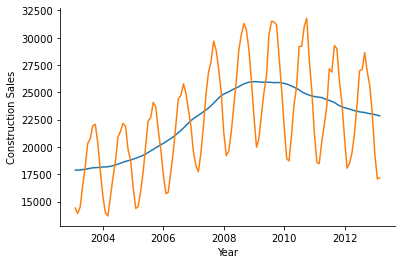

In [184]:
df1['R1'] = df1['Public Construction'] - df1['MovAvg']
df1['R1Error'] = abs(df1['R1']/df1['MovAvg'])

fig,ax = plt.subplots()
ax.plot(df1['MovAvg'],label='Moving Avg.')
ax.plot(df1['Public Construction'],label='Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Sales')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

pd.options.display.max_rows = None
display(df1)

Average Residual:  -61.733777322404364


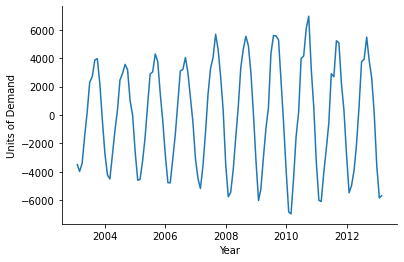

In [185]:
fig,ax = plt.subplots()
ax.plot(df1['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', df1['R1'].mean())

In [186]:
maxCorr = 0.0
period = np.NaN
for i in range(1,25):
    corr = df1['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8491719686828486
Correlation, lag  2     0.4816401870536206
Correlation, lag  3     -0.011840023339884362
Correlation, lag  4     -0.4987016188834362
Correlation, lag  5     -0.8362285995426119
Correlation, lag  6     -0.9584853417076534
Correlation, lag  7     -0.8410219068050433
Correlation, lag  8     -0.49733417646177636
Correlation, lag  9     -0.0025052053488663563
Correlation, lag  10     0.4811044005440984
Correlation, lag  11     0.8398692171347962
Correlation, lag  12     0.9807625496082434
Correlation, lag  13     0.837236275145739
Correlation, lag  14     0.48028386067089557
Correlation, lag  15     -0.01010245635473136
Correlation, lag  16     -0.4907689931289587
Correlation, lag  17     -0.8244225050556095
Correlation, lag  18     -0.9473385681101439
Correlation, lag  19     -0.8313211744978632
Correlation, lag  20     -0.49319826964223085
Correlation, lag  21     -0.009194028259920604
Correlation, lag  22     0.46816047357468393
Correlation, lag

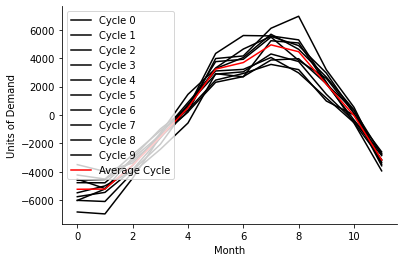

In [187]:
period = 12
cycleLen = period
numCycles = int(len(df1)/cycleLen + 0.5)
cycles = [df1.iloc[range(i*period,min((i+1)*period,len(df1)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df1.iloc[range(i,len(df1['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

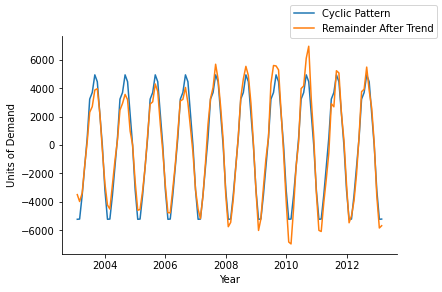

In [188]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df1)/cycleLen + 0.5)
df1['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df1)):
    df1.loc[df.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df1['C'],label='Cyclic Pattern')
ax.plot(df1['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Squared Error:  513712.62746810436


,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error,C,fit,R2Private,R2ErrorPrivate
2003-01-31,13,Jan-03,59877,45473,14404,54694.375000,4.020709e+04,-9221.375000,0.168598,-9421.892045,45272.482955,200.517045,0.004410
2003-02-28,14,Feb-03,58526,44620,13906,54937.625000,2.017031e+05,-10317.625000,0.187806,-9868.511364,45069.113636,-449.113636,0.010065
2003-03-31,15,Mar-03,64506,49996,14510,55237.083333,1.140121e+06,-5241.083333,0.094883,-4173.318750,51063.764583,-1067.764583,0.021357
2003-04-30,16,Apr-03,69638,53195,16444,55576.541667,7.721283e+05,-2381.541667,0.042852,-1502.833333,54073.708333,-878.708333,0.016519
2003-05-31,17,May-03,74473,56286,18187,55949.708333,1.591635e+06,336.291667,0.006011,1597.891667,57547.600000,-1261.600000,0.022414
2003-06-30,18,Jun-03,80377,60076,20301,56392.541667,4.357458e+05,3683.458333,0.065318,4343.568750,60736.110417,-660.110417,0.010988
2003-07-31,19,Jul-03,82971,62216,20755,56911.583333,2.059703e+04,5304.416667,0.093205,5447.933333,62359.516667,-143.516667,0.002307
2003-08-31,20,Aug-03,85191,63234,21957,57530.833333,1.314897e+06,5703.166667,0.099132,6849.856250,64380.689583,-1146.689583,0.018134
2003-09-30,21,Sep-03,83841,61767,22075,58188.187500,5.677591e+05,3578.812500,0.061504,4332.310417,62520.497917,-753.497917,0.012199
2003-10-31,22,Oct-03,83133,62813,20321,58820.229167,2.037173e+06,3992.770833,0.067881,5420.066667,64240.295833,-1427.295833,0.022723


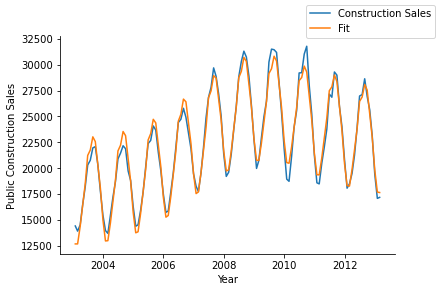

In [189]:
df1['fit'] = df1['MovAvg'] + df1['C']
df1['R2Public'] = df1['Public Construction'] - df1['fit']
df1['R2ErrorPublic'] = abs(df1['R2Public']/df1['Public Construction'])
df1['sqErr'] = (df1['Public Construction'] - df1['fit'])**2

print('Average Squared Error: ', df1['sqErr'].mean())
pd.options.display.max_rows = None
display(df)

fig,ax = plt.subplots()
ax.plot(df1['Public Construction'],label='Construction Sales')
ax.plot(df1['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Sales')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()